# Drif Diffusion Models test

## 1. Change in Drift

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm import tqdm
from scipy.stats import norm

In [2]:
drift_vel_1 = 2; drift_vel_2 = 4
std_1 = 0.2; std_2 = 0.7
x1_0 = x2_0 = 0
theta = 2
dt = 1e-4

In [3]:
RT_arr_1 = []
for sim_no in tqdm(range(500)):
    x_t = x1_0; mu = drift_vel_1; D = std_1
    dv_arr = [x_t]
    x_t_1 = x_t + mu*dt + D*np.random.normal(0,1)*(dt**0.5)
    dv_arr.append(x_t_1)
    x_t = x_t_1

    t = 1
    while x_t_1 < theta:
        x_t_1 = x_t + mu*dt + D*np.random.normal(0,2)*(dt**0.5)
        x_t = x_t_1

        dv_arr.append(x_t_1)
        t += 1

    RT_arr_1.append(t*dt)

# clear_output(wait=True)

# plt.plot(dv_arr)
# plt.show()

# histogram of RT_arr_1


100%|██████████| 500/500 [00:06<00:00, 81.89it/s]


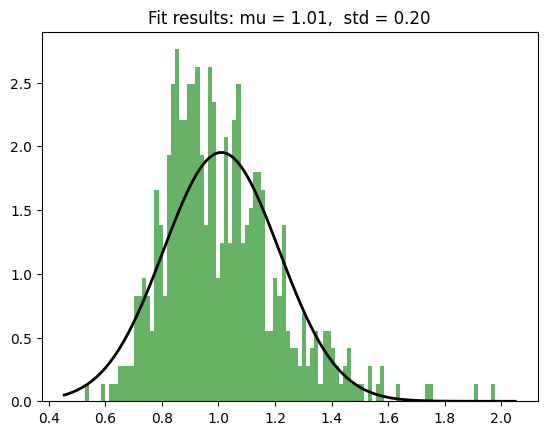

In [10]:
RT_arr_1 = np.array(RT_arr_1)  # Ensure it's a NumPy array for processing
mu, std = norm.fit(RT_arr_1)

bins = 100

plt.hist(RT_arr_1, bins=bins, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


In [11]:
RT_arr_2 = []
for sim_no in tqdm(range(500)):
    x_t = x2_0; mu = drift_vel_2; D = std_2
    dv_arr = [x_t]
    x_t_1 = x_t + mu*dt + D*np.random.normal(0,1)*(dt**0.5)
    dv_arr.append(x_t_1)
    x_t = x_t_1

    t = 1
    while x_t_1 < theta:
        x_t_1 = x_t + mu*dt + D*np.random.normal(0,2)*(dt**0.5)
        x_t = x_t_1

        dv_arr.append(x_t_1)
        t += 1

    RT_arr_2.append(t*dt)

# clear_output(wait=True)

# plt.plot(dv_arr)
# plt.show()

# histogram of RT_arr_1


100%|██████████| 500/500 [00:03<00:00, 161.95it/s]


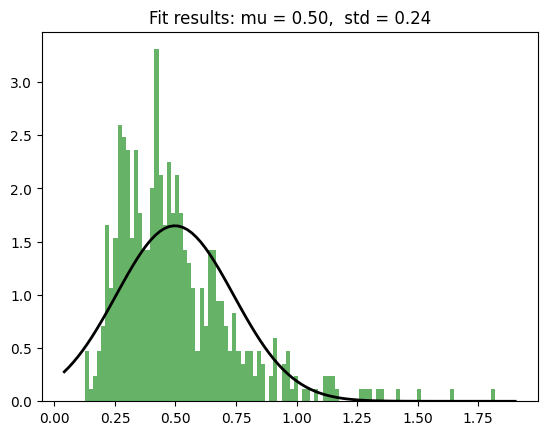

In [13]:
RT_arr_2 = np.array(RT_arr_2)  # Ensure it's a NumPy array for processing
mu2, std2 = norm.fit(RT_arr_2)

bins = 100

plt.hist(RT_arr_2, bins=bins, density=True, alpha=0.6, color='g')

xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)

plt.plot(x2, p2, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu2, std2)
plt.title(title)

plt.show()


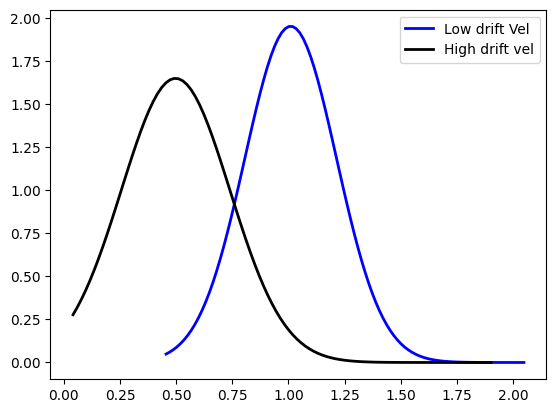

In [14]:
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x2, p2, 'k', linewidth=2)

# legend
plt.legend(['Low drift Vel', 'High drift vel'])
plt.show()

## 2. Thresholds are different

In [15]:
drift_vel = 2
std_1 = 0.2
x1_0 = x2_0 = 0
theta_1 = 2; theta_2 = 4
dt = 1e-4

In [4]:
RT_arr_1 = []
for sim_no in tqdm(range(500)):
    x_t = x1_0; mu = drift_vel_1; D = std_1
    dv_arr = [x_t]
    x_t_1 = x_t + mu*dt + D*np.random.normal(0,1)*(dt**0.5)
    dv_arr.append(x_t_1)
    x_t = x_t_1

    t = 1
    while x_t_1 < theta_1:
        x_t_1 = x_t + mu*dt + D*np.random.normal(0,2)*(dt**0.5)
        x_t = x_t_1

        dv_arr.append(x_t_1)
        t += 1

    RT_arr_1.append(t*dt)


  0%|          | 0/500 [00:10<?, ?it/s]


KeyboardInterrupt: 

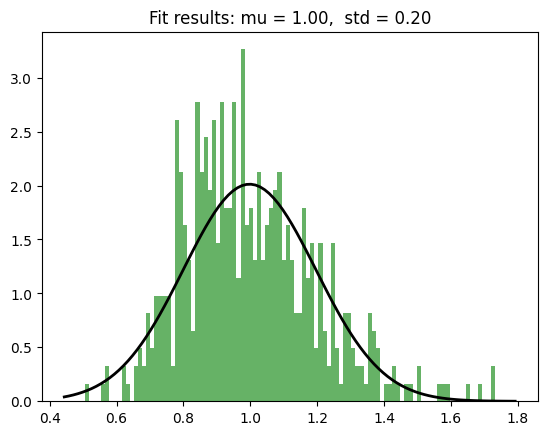

In [17]:
RT_arr_1 = np.array(RT_arr_1) 
mu, std = norm.fit(RT_arr_1)

bins = 100

plt.hist(RT_arr_1, bins=bins, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()


In [18]:
RT_arr_2 = []
for sim_no in tqdm(range(500)):
    x_t = x1_0; mu = drift_vel_1; D = std_1
    dv_arr = [x_t]
    x_t_1 = x_t + mu*dt + D*np.random.normal(0,1)*(dt**0.5)
    dv_arr.append(x_t_1)
    x_t = x_t_1

    t = 1
    while x_t_1 < theta_2:
        x_t_1 = x_t + mu*dt + D*np.random.normal(0,2)*(dt**0.5)
        x_t = x_t_1

        dv_arr.append(x_t_1)
        t += 1

    RT_arr_2.append(t*dt)


100%|██████████| 500/500 [00:14<00:00, 34.11it/s]


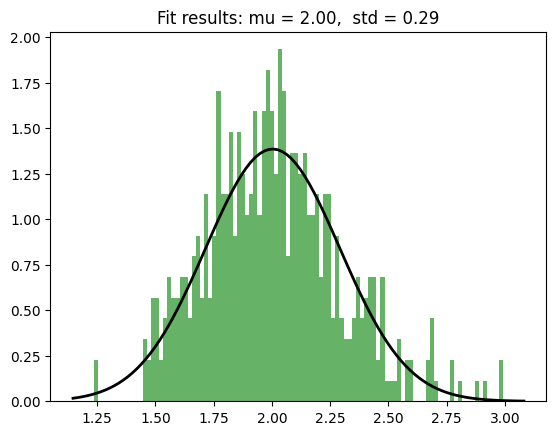

In [19]:
RT_arr_2 = np.array(RT_arr_2)  # Ensure it's a NumPy array for processing
mu2, std2 = norm.fit(RT_arr_2)

bins = 100

plt.hist(RT_arr_2, bins=bins, density=True, alpha=0.6, color='g')

xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)

plt.plot(x2, p2, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu2, std2)
plt.title(title)

plt.show()


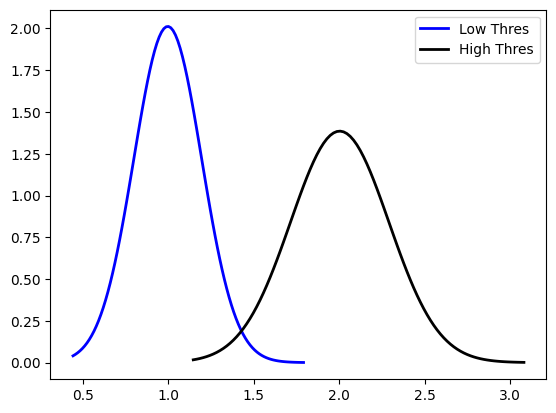

In [20]:
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x2, p2, 'k', linewidth=2)

# legend
plt.legend(['Low Thres', 'High Thres'])
plt.show()

## 3. Scaled Time

In [21]:
drift_vel_1 = 0.3
std_1 = 0.001
x1_0 = x2_0 = 0
theta_1 = 1 # so that z = x/theta = x/1 = x
dt = 1e-4

# time scale factors
alpha_1 = 10; alpha_2 = 100

In [22]:
RT_arr_1 = []

dtau = dt*alpha_1
for sim_no in tqdm(range(500)):
     
    x_t = x1_0; mu = drift_vel_1; D = std_1
    dv_arr = [x_t]
    x_t_1 = x_t + mu*dtau + D*np.random.normal(0,1)*(dtau**0.5)
    dv_arr.append(x_t_1)
    x_t = x_t_1

    t = 1
    while x_t_1 < theta_1:
        x_t_1 = x_t + mu*dtau + D*np.random.normal(0,2)*(dtau**0.5)
        x_t = x_t_1

        dv_arr.append(x_t_1)
        t += 1

    RT_arr_1.append(t*dtau)


  0%|          | 0/500 [00:00<?, ?it/s]

100%|██████████| 500/500 [00:02<00:00, 230.47it/s]


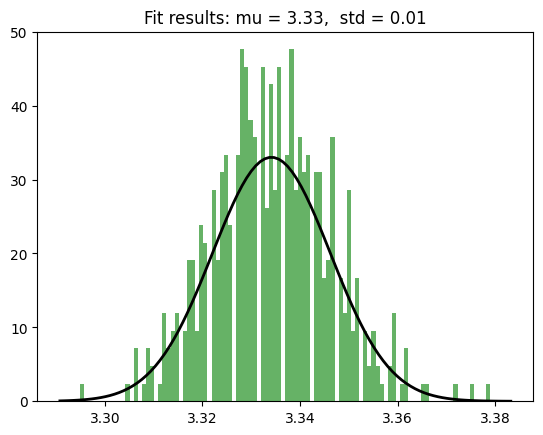

In [23]:
RT_arr_1 = np.array(RT_arr_1) 
mu, std = norm.fit(RT_arr_1)

bins = 100

plt.hist(RT_arr_1, bins=bins, density=True, alpha=0.6, color='g')

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
plt.title(title)

plt.show()

In [24]:
RT_arr_2 = []

dtau = dt*alpha_2
for sim_no in tqdm(range(500)):
     
    x_t = x1_0; mu = drift_vel_1; D = std_1
    dv_arr = [x_t]
    x_t_1 = x_t + mu*dtau + D*np.random.normal(0,1)*(dtau**0.5)
    dv_arr.append(x_t_1)
    x_t = x_t_1

    t = 1
    while x_t_1 < theta_1:
        x_t_1 = x_t + mu*dtau + D*np.random.normal(0,2)*(dtau**0.5)
        x_t = x_t_1

        dv_arr.append(x_t_1)
        t += 1

    RT_arr_2.append(t*dtau)


100%|██████████| 500/500 [00:00<00:00, 2099.97it/s]


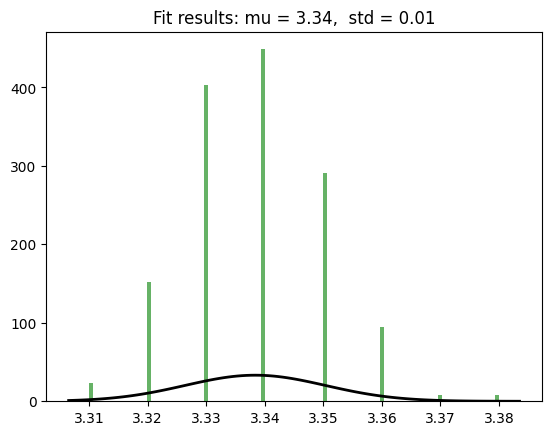

In [25]:
RT_arr_2 = np.array(RT_arr_2)  # Ensure it's a NumPy array for processing
mu2, std2 = norm.fit(RT_arr_2)

bins = 100

plt.hist(RT_arr_2, bins=bins, density=True, alpha=0.6, color='g')

xmin2, xmax2 = plt.xlim()
x2 = np.linspace(xmin2, xmax2, 100)
p2 = norm.pdf(x2, mu2, std2)

plt.plot(x2, p2, 'k', linewidth=2)
title = "Fit results: mu = %.2f,  std = %.2f" % (mu2, std2)
plt.title(title)

plt.show()


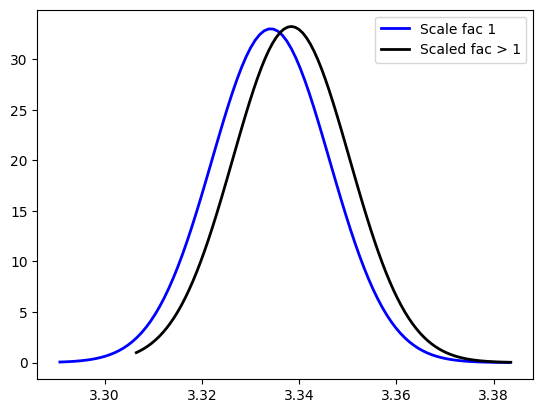

In [26]:
plt.plot(x, p, 'b', linewidth=2)
plt.plot(x2, p2, 'k', linewidth=2)

# legend
plt.legend(['Scale fac low', 'Scaled fac high'])
plt.show()